<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 4*

# 📝 Assignment
---

# Logistic Regression

이번에는 [**Cardiovascular Disease dataset**](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset) 데이터셋을 사용해 봅시다. 데이터에 대한 설명을 캐글 페이지에서 잘 살펴보시고 과제를 진행해 주세요!

### 1) 데이터를 전처리 하겠습니다.
- 데이터를 불러오세요.(read_csv 사용)
- id 칼럼은 drop하세요.
- missing value를 확인하세요.
- 중복된 샘플이 있는지 확인하세요.
- **중복된 샘플을 제거하고 남은 샘플의 수를 과제 제출폼에 제출하세요.**

In [1]:
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/cardio/cardio_train.csv', sep=';')

In [2]:
# 데이터 확인
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# id컬럼 삭제
df = df.drop("id", axis=1)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# 결측치 확인 -> 없음
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
# 중복된 샘플 확인
import numpy as np
duple = df.duplicated()
duple_index = np.where(duple==True)

# 개수 및 인덱스no 확인
print("중복된 샘플 :",len(duple_index[0]),"개" )
print("중복된 샘플의 인덱스 no :", duple_index[0])

# 중복값 제거 - 나중에 나오는 중복값을 제거
df.drop_duplicates(keep="first", inplace=True)

# 데이터 프레임 확인 -> 남은 샘플 개수 69,976개
df

중복된 샘플 : 24 개
중복된 샘플의 인덱스 no : [10562 21784 38505 40365 42450 44653 45125 45748 45810 48917 50432 52552
 56643 56906 57946 58730 60453 60474 62318 64169 65079 65622 66190 68281]


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


### 2) 다운로드 한 훈련 데이터를 훈련/검증/테스트 세트로 나누어 주세요.
- 타겟 특성을 확인하고 타겟 변수를 나누어 줍니다.
- 훈련과 테스트 데이터로 나누어 줍니다(train_test_split 사용, train/test = 80/20, random_state=2)
- 훈련데이터를 훈련과 검증데이터로 나누어 줍니다(train_test_split 사용, train/validation = 80/20)
- **검증 데이터(X_val)의 갯수를 과제 제출폼에 제출하세요.**

In [6]:
# 전체 데이터 나누기 : 훈련용(80%), 테스트용(20%)
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,test_size=0.2, random_state=2)

print(train.shape, test.shape)

(55980, 12) (13996, 12)


In [7]:
# 훈련용 데이터를 다시 나누기 : 훈련용(80%), 검증용(20%)
train, val = train_test_split(train, test_size=0.2, random_state=2)

print(train.shape, val.shape)   # 검증용 데이터 : 11,196개

(44784, 12) (11196, 12)


### 3) 사이킷런의 LogisticRegression을 사용해 모델을 만들어 보세요.
- 모델을 만들기 전에 기준모델을 설정합니다.
- **LogisticRegression 모델을 학습하고(max_iter=1000) 검증세트 정확도를 과제 제출폼에 제출하세요.**


In [8]:
# 타겟 및 범주 확인
target = "cardio"

# 모델 학습을 위해 훈련용, 검증용 데이터를 각각 features와 target으로 분류
y_train = train[target]
X_train = train.drop(target, axis=1)
y_val = val[target]
X_val = val.drop(target, axis=1)

# 데이터의 volume 확인
print("훈련용 데이터 확인 / features: {0}, target{1}".format(X_train.shape, y_train.shape))
print("검증용 데이터 확인 / features: {0}, target{1}".format(X_val.shape, y_val.shape))

훈련용 데이터 확인 / features: (44784, 11), target(44784,)
검증용 데이터 확인 / features: (11196, 11), target(11196,)


In [9]:
# 훈련용 데이터의 target을 분리한 후 탐색하기
print('y_train의 target 데이터 확인')
print(y_train.value_counts(normalize=True))

# mode()를 활용해서 최빈값 구하기
major = y_train.mode()[0]

# 타겟 샘플 수 만큼 최빈값을 반복하여 리스트에 저장. 기준모델로 사용
y_pred = [major] * len(y_train)

# 기준모델과 훈련용 데이터의 타깃 데이터를 비교한 후 정확도 비교
from sklearn.metrics import accuracy_score
print("\n기준모델과 훈련용 데이터 학습 정확도 :", accuracy_score(y_train, y_pred))

y_train의 target 데이터 확인
1    0.501697
0    0.498303
Name: cardio, dtype: float64

기준모델과 훈련용 데이터 학습 정확도 : 0.501697034655234


In [10]:
# 로지스틱 회귀모델 생성 및 훈련
from sklearn.linear_model import LogisticRegression

# 객체 생성 : max_iter는 1000으로 설정
logistic = LogisticRegression(max_iter=1000)

# 모델 훈련
logistic.fit(X_train, y_train)

# 검증세트의 정확도 측정 - X_val, y_val사용, score 속성 사용
print('검증세트 예측 정확도', logistic.score(X_val, y_val))

검증세트 예측 정확도 0.7073061807788495


### 4) 데이터에서 범주형 성질을 지닌 특성을 찾아 원핫인코딩 하세요.
- category_encoders를 사용해서 'gender' 특성만 원핫인코딩 하세요.
- LogisticRegression 모델을 다시 학습합니다.
- **검증세트 정확도를 과제 제출폼에 제출하세요.**

In [11]:
# !pip install category_encoders

In [12]:
# 원핫인코딩
from category_encoders import OneHotEncoder

# 인코딩 객체 생성, gender 컬럼만 인코딩
encoder = OneHotEncoder(use_cat_names=True, cols="gender")

# 훈련용 데이터 fit_transform
X_train_encoded = encoder.fit_transform(X_train)

# 검증용 데이터 : transform
X_val_encoded = encoder.transform(X_val)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [13]:
# 로지스틱 회귀모델 생성 및 훈련
# 객체 생성
logistic = LogisticRegression(max_iter=1000)

# 모델 훈련 : 인코딩 완료한 데이터 사용 (X_train_encoded)
logistic.fit(X_train_encoded, y_train)

# 검증세트의 정확도 측정 : X_val_encoded, y_val사용, score 속성 사용
print('검증세트 정확도', logistic.score(X_val_encoded, y_val))

검증세트 정확도 0.6944444444444444


### 5) 학습한 모델을 검증세트에서 최적화 시킨 후, 테스트세트에서 딱 한 번 정확도를 확인해 보세요.
- **테스트 세트 정확도를 과제 제출폼에 제출하세요.(0.712 이상)**

In [14]:
# 테스트 데이터 features와 target 분리
y_test = test[target]
X_test = test.drop(target, axis=1)

# 확인
print("테스트용 데이터 확인 / features: {0}, target{1}".format(X_test.shape, y_test.shape))

테스트용 데이터 확인 / features: (13996, 11), target(13996,)


In [15]:
# "최적화"라고 한다면 정확히 어떤 작업을 말하는 것일까? 다양하게 생각해보자.
# 1) 수업 내용엔 없었지만 하이퍼파라미터(C) 조정
# 객체 생성 & 모델 훈련
logistic_001 = LogisticRegression(C=0.01, max_iter=1000).fit(X_train_encoded, y_train)
logistic_01 = LogisticRegression(C=0.1, max_iter=1000).fit(X_train_encoded, y_train)
logistic = LogisticRegression(max_iter=1000).fit(X_train_encoded, y_train)
logistic_1 = LogisticRegression(C=1, max_iter=1000).fit(X_train_encoded, y_train)
logistic_10 = LogisticRegression(C=10, max_iter=1000).fit(X_train_encoded, y_train)


# 검증 데이터셋으로 정확도 측정
print('C=0.01 정확도', logistic_001.score(X_val_encoded, y_val))
print('C=0.1 정확도', logistic_01.score(X_val_encoded, y_val))
print('C=default 정확도', logistic.score(X_val_encoded, y_val))
print('C=1 정확도', logistic_1.score(X_val_encoded, y_val))
print('C=10 정확도', logistic_10.score(X_val_encoded, y_val))

C=0.01 정확도 0.6942658092175777
C=0.1 정확도 0.7092711682743837
C=default 정확도 0.6944444444444444
C=1 정확도 0.6944444444444444
C=10 정확도 0.7093604858878171


In [16]:
# 2) 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

# 객체 생성 & 모델 훈련
logistic_001_scaled = LogisticRegression(C=0.01, max_iter=1000).fit(X_train_scaled, y_train)
logistic_01_scaled = LogisticRegression(C=0.1, max_iter=1000).fit(X_train_scaled, y_train)
logistic_scaled = LogisticRegression(max_iter=1000).fit(X_train_scaled, y_train)
logistic_1_scaled = LogisticRegression(C=1, max_iter=1000).fit(X_train_scaled, y_train)
logistic_10_scaled = LogisticRegression(C=10, max_iter=1000).fit(X_train_scaled, y_train)

# 검증 데이터셋으로 정확도 측정
print('C=0.01 정확도', logistic_001_scaled.score(X_val_scaled, y_val))
print('C=0.1 정확도', logistic_01_scaled.score(X_val_scaled, y_val))
print('C=default 정확도', logistic_scaled.score(X_val_scaled, y_val))
print('C=1 정확도', logistic_1_scaled.score(X_val_scaled, y_val))
print('C=10 정확도', logistic_10_scaled.score(X_val_scaled, y_val))

C=0.01 정확도 0.7057877813504824
C=0.1 정확도 0.721686316541622
C=default 정확도 0.723383351196856
C=1 정확도 0.723383351196856
C=10 정확도 0.7237406216505895


In [17]:
# 데이터 표준화 작업이 모델 최적화에 더욱 효과적인 것 같다.
# 테스트 데이터도 똑같이 표준화 후 모델 학습을 진행해 본다.

# test데이터의 gender 원핫인코딩
X_test_encoded = encoder.transform(X_test)

# test데이터 표준화
X_test_scaled = scaler.transform(X_test_encoded)

# test데이터를 가지고 예측 (1회) -> 정확도 UP
print('테스트 세트 정확도', logistic_scaled.score(X_test_scaled, y_test))

테스트 세트 정확도 0.7264218348099457


## 🔥 도전과제:

### 6) EDA를 추가적으로 수행하고 가능한 방법으로 모델을 튜닝해서 결과를 만들어 보세요. 최소한 다음 내용들이 포함이 되어야 합니다.
- 새로운 특성을 최소한 한 개 이상 만드세요.
- 특성들을 확인해서 아웃라이어라고 생각되는 데이터를 가진 샘플을 제거하세요.
- [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html) 을 사용하세요. (여러가지 종류의 Scalar를 어떤 상황에 적용해야 하는지 알아보고 사용해 보세요.)
- 만들어진 모델 성능을 리포팅하고 해석합니다.


In [18]:
# 새로운 특성 1 : 키와 몸무게를 가지고 BMI를 계산할 수 있다.
# BMI 계산 : 체중(kg)/신장(m)제곱

df["BMI"] = round(df["weight"]/pow(df["height"]*0.01, 2), 2)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01


In [19]:
# 새로운 특성 2 : age를 days -> years 로 바꾸어서 가독성을 높일 수 있다.
df["age_year"] = round(df["age"]/365, -1).astype("int")
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,age_year
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93,60
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51,50
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71,50
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01,50


In [20]:
# 새로운 특성 3 : 혈압 관련 컬럼을 활용해서 평균혈압을 구할 수 있다.
# 평균 혈압 계산법 : (수축기혈압 - 이완기혈압)*1/3 + 이완기혈압
ap_avg= (df["ap_hi"]-df["ap_lo"])*1/3 + df["ap_lo"]
df["ap_avg"] = round(ap_avg, 2)

df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,age_year,ap_avg
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97,50,90.00
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93,60,106.67
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51,50,90.00
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71,50,116.67
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01,50,73.33


In [21]:
# 원활한 반복문 구동을 위한 인덱스 재설정
df.reset_index(drop=True, inplace=True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,age_year,ap_avg
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97,50,90.00
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93,60,106.67
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51,50,90.00
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71,50,116.67
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01,50,73.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69971,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.93,50,93.33
69972,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.47,60,106.67
69973,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.35,50,120.00
69974,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.10,60,98.33


In [22]:
# 새로운 특성 4 : 혈압 관련 컬럼을 활용해서 고/저혈압을 판단 할 수 있다.
# 고혈압 (high) : 수축기혈압 140이상 or 이완기혈압 90이상  
# 고혈압위험군 (high_risk) : 수축기혈압 120 이상 or 이완기혈압 80이상 
# 정상혈압(nomal) : 수축기혈압 120미만 and 이완기혈압 80미만
# 저혈압(low) : 수축기혈압 90이하 or 이완기혈압 60이하 

# 혈압 증상 기록을 위한 빈 컬럼 마련
df["ap_type"] = " "

# 수축기혈압(ap_hi)과 이완기혈압(ap_lo) 수치를 if문 조건으로 비교하여 구분

for index in range(len(df)):
  ap_hi = df["ap_hi"][index]
  ap_lo = df["ap_lo"][index]

  if ap_hi >= 140 or ap_lo>= 90:
    df["ap_type"][index] = "high"

  elif ap_hi <= 90 or ap_lo <= 60:
    df["ap_type"][index] = "low"

  elif ap_hi >= 120 or ap_lo >= 80:
    df["ap_type"][index] = "high_risk"

  elif ap_hi < 120 and ap_lo < 80:
    df["ap_type"][index] = "normal"

  else:
    df["ap_type"][index] = "ambi"

# 확인
df.head(20)

<ipython-input-22-e1fad990ff08>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ap_type"][index] = "high_risk"
<ipython-input-22-e1fad990ff08>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ap_type"][index] = "high"
<ipython-input-22-e1fad990ff08>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ap_type"][index] = "low"
<ipython-input-22-e1fad990ff08>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy 

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,age_year,ap_avg,ap_type
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97,50,90.00,high_risk
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93,60,106.67,high
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51,50,90.00,high_risk
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71,50,116.67,high
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01,50,73.33,low
5,21914,1,151,67.0,120,80,2,2,0,0,0,0,29.38,60,93.33,high_risk
6,22113,1,157,93.0,130,80,3,1,0,0,1,0,37.73,60,96.67,high_risk
7,22584,2,178,95.0,130,90,3,3,0,0,1,1,29.98,60,103.33,high
8,17668,1,158,71.0,110,70,1,1,0,0,1,0,28.44,50,83.33,normal
9,19834,1,164,68.0,110,60,1,1,0,0,0,0,25.28,50,76.67,low


In [23]:
df["ap_type"].value_counts()

high_risk    34970
high         24705
normal        7233
low           3068
Name: ap_type, dtype: int64

In [24]:
# 컬럼 재정렬
df_clean_1 = df[["age", "age_year", "gender", "height", "weight", "BMI", "ap_hi", "ap_lo", "ap_avg", "ap_type", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"]]

In [25]:
# feature 탐색 1. 나이(age, age_year)
df_clean_1[["age", "age_year"]].describe()

,age,age_year
count,69976.000000,69976.000000
mean,19468.950126,52.996885
std,2467.374620,7.096762
min,10798.000000,30.000000
25%,17664.000000,50.000000
50%,19703.000000,50.000000
75%,21327.000000,60.000000
max,23713.000000,60.000000


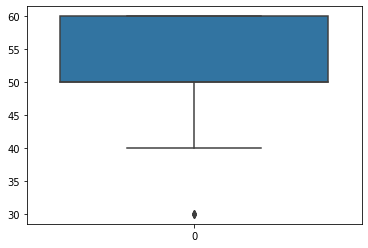

In [26]:
# 나이를 박스플롯으로 시각화하여 outlier 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 14]
%matplotlib inline

sns.boxplot(data=df_clean_1["age_year"])
plt.show()

In [27]:
# 나이 outlier제거
df_clean_1 = df_clean_1[df["age_year"]>40]
df_clean_1

,age,age_year,gender,height,weight,BMI,ap_hi,ap_lo,ap_avg,ap_type,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50,2,168,62.0,21.97,110,80,90.00,high_risk,1,1,0,0,1,0
1,20228,60,1,156,85.0,34.93,140,90,106.67,high,3,1,0,0,1,1
2,18857,50,1,165,64.0,23.51,130,70,90.00,high_risk,3,1,0,0,0,1
3,17623,50,2,169,82.0,28.71,150,100,116.67,high,1,1,0,0,1,1
4,17474,50,1,156,56.0,23.01,100,60,73.33,low,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69971,19240,50,2,168,76.0,26.93,120,80,93.33,high_risk,1,1,1,0,1,0
69972,22601,60,1,158,126.0,50.47,140,90,106.67,high,2,2,0,0,1,1
69973,19066,50,2,183,105.0,31.35,180,90,120.00,high,3,1,0,1,0,1
69974,22431,60,1,163,72.0,27.10,135,80,98.33,high_risk,1,2,0,0,0,1


In [28]:
# feature 탐색 2. BMI
df_clean_1[["height", "weight", "BMI"]].describe()

,height,weight,BMI
count,59706.000000,59706.000000,59706.000000
mean,164.177553,74.502269,27.727656
std,8.167535,14.321301,6.032943
min,55.000000,10.000000,3.470000
25%,159.000000,65.000000,23.920000
50%,164.000000,72.000000,26.570000
75%,169.000000,82.000000,30.470000
max,250.000000,200.000000,298.670000


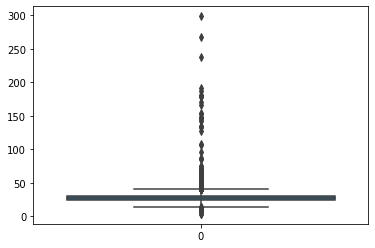

In [29]:
# BMI를 박스플롯으로 시각화하여 outlier 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 14]
%matplotlib inline

sns.boxplot(data=df_clean_1["BMI"])
plt.show()

In [30]:
# BMI의 이상치 : 데이터를 확인하여 이상치 제거 필요
df_clean_1[df_clean_1["BMI"]>=60]

# 신장 64cm? 65cm? 기입 오류로 보임.

,age,age_year,gender,height,weight,BMI,ap_hi,ap_lo,ap_avg,ap_type,cholesterol,gluc,smoke,alco,active,cardio
224,21800,60,2,76,55.0,95.22,120,80,93.33,high_risk,1,1,0,0,1,0
389,16718,50,2,165,169.0,62.08,120,80,93.33,high_risk,1,1,0,0,1,0
2458,23646,60,2,159,165.0,65.27,130,70,90.00,high_risk,1,1,0,0,0,0
3313,17545,50,1,155,155.0,64.52,160,1000,720.00,high,1,1,0,0,1,1
6153,20990,60,1,122,161.0,108.17,120,80,93.33,high_risk,1,1,0,0,1,1
8171,17646,50,2,97,170.0,180.68,160,100,120.00,high,1,1,1,0,1,1
8677,19698,50,2,119,89.0,62.85,160,90,113.33,high,1,1,0,0,1,1
11229,18307,50,1,110,90.0,74.38,120,80,93.33,high_risk,1,1,0,0,1,0
12434,22077,60,1,137,161.0,85.78,150,100,116.67,high,2,1,0,0,0,1
12769,19594,50,1,75,168.0,298.67,120,80,93.33,high_risk,1,1,1,0,1,1


In [31]:
# 신장 값이 100 (= 1m) 이하는 모두 삭제
df_clean_1 = df_clean_1[df_clean_1["height"]>100]
df_clean_1.head(20)

,age,age_year,gender,height,weight,BMI,ap_hi,ap_lo,ap_avg,ap_type,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50,2,168,62.0,21.97,110,80,90.00,high_risk,1,1,0,0,1,0
1,20228,60,1,156,85.0,34.93,140,90,106.67,high,3,1,0,0,1,1
2,18857,50,1,165,64.0,23.51,130,70,90.00,high_risk,3,1,0,0,0,1
3,17623,50,2,169,82.0,28.71,150,100,116.67,high,1,1,0,0,1,1
4,17474,50,1,156,56.0,23.01,100,60,73.33,low,1,1,0,0,0,0
5,21914,60,1,151,67.0,29.38,120,80,93.33,high_risk,2,2,0,0,0,0
6,22113,60,1,157,93.0,37.73,130,80,96.67,high_risk,3,1,0,0,1,0
7,22584,60,2,178,95.0,29.98,130,90,103.33,high,3,3,0,0,1,1
8,17668,50,1,158,71.0,28.44,110,70,83.33,normal,1,1,0,0,1,0
9,19834,50,1,164,68.0,25.28,110,60,76.67,low,1,1,0,0,0,0


In [32]:
# feature 탐색 3.혈압 관련 feature 확인
df_clean_1[["ap_hi", "ap_lo", "ap_avg"]].describe()

,ap_hi,ap_lo,ap_avg
count,59683.000000,59683.000000,59683.000000
mean,129.942915,97.824808,108.529932
std,156.178407,192.053666,138.966296
min,-150.000000,-70.000000,-41.670000
25%,120.000000,80.000000,93.330000
50%,120.000000,80.000000,93.330000
75%,140.000000,90.000000,104.500000
max,16020.000000,11000.000000,7400.000000


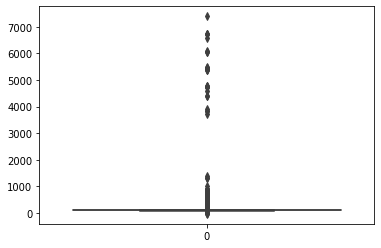

In [33]:
# 혈압이 마이너스값일 수 있을까?
# 수축기,이완기 혈압 컬럼의 최대값이 10,000 이상이 된다?
# 분명 잘못된 데이터이다.


# 평균 혈압 수치를 박스플롯으로 시각화하여 outlier 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 14]
%matplotlib inline

sns.boxplot(data=df_clean_1["ap_avg"])
plt.show()

In [34]:
# 혈압 데이터가 음수인 row - 수축기혈압 확인
df_clean_1[df_clean_1["ap_hi"]<=0]

,age,age_year,gender,height,weight,BMI,ap_hi,ap_lo,ap_avg,ap_type,cholesterol,gluc,smoke,alco,active,cardio
16020,22108,60,2,161,90.0,34.72,-115,70,8.33,low,1,1,0,0,1,0
23986,18301,50,1,162,74.0,28.20,-140,90,13.33,high,1,1,0,0,1,1
35038,23325,60,2,168,59.0,20.90,-150,80,3.33,low,1,1,0,0,1,1
46618,23646,60,2,160,59.0,23.05,-120,80,13.33,low,1,1,0,0,0,0


In [35]:
# 혈압 데이터가 음수인 row 확인 - 이완기혈압 확인
df_clean_1[df_clean_1["ap_lo"]<=0]

,age,age_year,gender,height,weight,BMI,ap_hi,ap_lo,ap_avg,ap_type,cholesterol,gluc,smoke,alco,active,cardio
2014,22712,60,2,167,59.0,21.16,906,0,302.00,high,1,1,0,0,1,0
16458,20457,60,1,156,50.0,20.55,138,0,46.00,low,3,1,0,0,1,1
17380,18226,50,1,164,78.0,29.00,138,0,46.00,low,1,1,0,0,1,0
22921,21182,60,2,166,68.0,24.68,149,0,49.67,high,1,1,0,0,1,1
25452,17952,50,2,176,73.0,23.57,12,0,4.00,low,1,1,0,0,1,0
27684,23396,60,2,180,73.0,22.53,140,0,46.67,high,1,1,1,1,1,1
38368,23208,60,2,170,81.0,28.03,148,0,49.33,high,1,1,0,0,1,0
40327,20322,60,1,162,50.0,19.05,309,0,103.00,high,1,1,0,0,1,0
41501,20970,60,1,154,41.0,17.29,806,0,268.67,high,1,1,0,0,1,0
42393,17988,50,2,176,69.0,22.28,906,0,302.00,high,1,1,0,0,1,0


In [36]:
# 음수값 삭제
df_clean_1 = df_clean_1[df_clean_1["ap_lo"]>0]
df_clean_1 = df_clean_1[df_clean_1["ap_hi"]>0]

df_clean_1[["ap_hi", "ap_lo", "ap_avg"]].describe()

,ap_hi,ap_lo,ap_avg
count,59662.000000,59662.000000,59662.000000
mean,129.912390,97.855050,108.539919
std,156.065683,192.079487,138.975158
min,1.000000,1.000000,12.000000
25%,120.000000,80.000000,93.330000
50%,120.000000,80.000000,93.330000
75%,140.000000,90.000000,104.670000
max,16020.000000,11000.000000,7400.000000


In [37]:
# 수축기 혈압이 이완기 혈압보다 낮을 수는 없다.
# 수축기 혈압이 이완기 혈압보다 낮은 row 삭제
df_clean_1 = df_clean_1[df_clean_1["ap_hi"] > df_clean_1["ap_lo"]]
df_clean_1.head(20)

,age,age_year,gender,height,weight,BMI,ap_hi,ap_lo,ap_avg,ap_type,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50,2,168,62.0,21.97,110,80,90.00,high_risk,1,1,0,0,1,0
1,20228,60,1,156,85.0,34.93,140,90,106.67,high,3,1,0,0,1,1
2,18857,50,1,165,64.0,23.51,130,70,90.00,high_risk,3,1,0,0,0,1
3,17623,50,2,169,82.0,28.71,150,100,116.67,high,1,1,0,0,1,1
4,17474,50,1,156,56.0,23.01,100,60,73.33,low,1,1,0,0,0,0
5,21914,60,1,151,67.0,29.38,120,80,93.33,high_risk,2,2,0,0,0,0
6,22113,60,1,157,93.0,37.73,130,80,96.67,high_risk,3,1,0,0,1,0
7,22584,60,2,178,95.0,29.98,130,90,103.33,high,3,3,0,0,1,1
8,17668,50,1,158,71.0,28.44,110,70,83.33,normal,1,1,0,0,1,0
9,19834,50,1,164,68.0,25.28,110,60,76.67,low,1,1,0,0,0,0


In [38]:
# 지나치게 높은/낮은 수축기혈압도 말이 안 됨. (몇 천, 몇 만)
# 수축기 혈압이 400 이상인 row 삭제
df_clean_1 = df_clean_1[df_clean_1["ap_hi"]<400]

# 수축기 혈압이 50 이하인 row 삭제
df_clean_1 = df_clean_1[df_clean_1["ap_hi"]>50]

df_clean_1.head(20)

,age,age_year,gender,height,weight,BMI,ap_hi,ap_lo,ap_avg,ap_type,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50,2,168,62.0,21.97,110,80,90.00,high_risk,1,1,0,0,1,0
1,20228,60,1,156,85.0,34.93,140,90,106.67,high,3,1,0,0,1,1
2,18857,50,1,165,64.0,23.51,130,70,90.00,high_risk,3,1,0,0,0,1
3,17623,50,2,169,82.0,28.71,150,100,116.67,high,1,1,0,0,1,1
4,17474,50,1,156,56.0,23.01,100,60,73.33,low,1,1,0,0,0,0
5,21914,60,1,151,67.0,29.38,120,80,93.33,high_risk,2,2,0,0,0,0
6,22113,60,1,157,93.0,37.73,130,80,96.67,high_risk,3,1,0,0,1,0
7,22584,60,2,178,95.0,29.98,130,90,103.33,high,3,3,0,0,1,1
8,17668,50,1,158,71.0,28.44,110,70,83.33,normal,1,1,0,0,1,0
9,19834,50,1,164,68.0,25.28,110,60,76.67,low,1,1,0,0,0,0


In [39]:
# 지나치게 낮은 이완기 혈압도 말이 안 됨
# 조사에 따르면 이완기 혈압이 30미만인 경우는 전체 인구의 0.22%.
# 여기서는 20 이하인 row 삭제

df_clean_1 = df_clean_1[df_clean_1["ap_lo"]>20]
df_clean_1

,age,age_year,gender,height,weight,BMI,ap_hi,ap_lo,ap_avg,ap_type,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50,2,168,62.0,21.97,110,80,90.00,high_risk,1,1,0,0,1,0
1,20228,60,1,156,85.0,34.93,140,90,106.67,high,3,1,0,0,1,1
2,18857,50,1,165,64.0,23.51,130,70,90.00,high_risk,3,1,0,0,0,1
3,17623,50,2,169,82.0,28.71,150,100,116.67,high,1,1,0,0,1,1
4,17474,50,1,156,56.0,23.01,100,60,73.33,low,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69971,19240,50,2,168,76.0,26.93,120,80,93.33,high_risk,1,1,1,0,1,0
69972,22601,60,1,158,126.0,50.47,140,90,106.67,high,2,2,0,0,1,1
69973,19066,50,2,183,105.0,31.35,180,90,120.00,high,3,1,0,1,0,1
69974,22431,60,1,163,72.0,27.10,135,80,98.33,high_risk,1,2,0,0,0,1


In [40]:
df_clean_1[["ap_hi", "ap_lo", "ap_avg"]].describe()

,ap_hi,ap_lo,ap_avg
count,58533.000000,58533.000000,58533.000000
mean,127.746485,81.799891,97.114492
std,16.749562,9.392894,11.004872
min,70.000000,30.000000,53.330000
25%,120.000000,80.000000,93.330000
50%,120.000000,80.000000,93.330000
75%,140.000000,90.000000,103.330000
max,240.000000,182.000000,186.670000


In [41]:
# 데이터 정제 후 인덱스 재정렬
df_clean = df_clean_1.reset_index(drop=True)
df_clean

,age,age_year,gender,height,weight,BMI,ap_hi,ap_lo,ap_avg,ap_type,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50,2,168,62.0,21.97,110,80,90.00,high_risk,1,1,0,0,1,0
1,20228,60,1,156,85.0,34.93,140,90,106.67,high,3,1,0,0,1,1
2,18857,50,1,165,64.0,23.51,130,70,90.00,high_risk,3,1,0,0,0,1
3,17623,50,2,169,82.0,28.71,150,100,116.67,high,1,1,0,0,1,1
4,17474,50,1,156,56.0,23.01,100,60,73.33,low,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58528,19240,50,2,168,76.0,26.93,120,80,93.33,high_risk,1,1,1,0,1,0
58529,22601,60,1,158,126.0,50.47,140,90,106.67,high,2,2,0,0,1,1
58530,19066,50,2,183,105.0,31.35,180,90,120.00,high,3,1,0,1,0,1
58531,22431,60,1,163,72.0,27.10,135,80,98.33,high_risk,1,2,0,0,0,1


In [42]:
# 모델 학습을 위해 데이터셋 나누기

# 전체 데이터 나누기 : 훈련용(80%), 테스트용(20%)
train_clean, test_clean = train_test_split(df_clean,test_size=0.2, random_state=2)

# 훈련용 데이터를 다시 나누기 : 훈련용(80%), 검증용(20%)
train_clean, val_clean = train_test_split(train_clean, test_size=0.2)

# 타겟 및 범주 확인
target = "cardio"

# 모델 학습을 위해 훈련용, 검증용 데이터를 각각 features와 target으로 분류
y_train = train_clean[target]
X_train = train_clean.drop(target, axis=1)
y_val = val_clean[target]
X_val = val_clean.drop(target, axis=1)
y_test = test_clean[target]
X_test = test_clean.drop(target, axis=1)

# 데이터의 volume 확인
print("훈련용 데이터 확인 / features: {0}, target{1}".format(X_train.shape, y_train.shape))
print("검증용 데이터 확인 / features: {0}, target{1}".format(X_val.shape, y_val.shape))
print("검증용 데이터 확인 / features: {0}, target{1}".format(X_test.shape, y_test.shape))

훈련용 데이터 확인 / features: (37460, 15), target(37460,)
검증용 데이터 확인 / features: (9366, 15), target(9366,)
검증용 데이터 확인 / features: (11707, 15), target(11707,)


In [43]:
# 기준모델 생성 및 평가 - 로지스틱 모델 성능 비교를 위한 작업

# mode()를 활용해서 최빈값 구하기
major = y_train.mode()[0]

# 타겟 샘플 수 만큼 최빈값을 반복하여 리스트에 저장. 기준모델로 사용
y_pred = [major] * len(y_train)

# 기준모델과 훈련용 데이터의 타깃 데이터를 비교한 후 정확도 비교
print("기준모델과 훈련용 데이터 학습 정확도 :", accuracy_score(y_train, y_pred))

기준모델과 훈련용 데이터 학습 정확도 : 0.5306727175654031


In [44]:
# categorical feature를 인코딩

# 인코딩 객체 생성, gender, ap_type 컬럼 인코딩
encoder = OneHotEncoder(use_cat_names=True, cols=["gender", "ap_type"])

# 훈련용 데이터 fit_transform
X_train_encoded = encoder.fit_transform(X_train)

# 검증용 데이터 : transform
X_val_encoded = encoder.transform(X_val)

# 테스트용 데이터 : trainform
X_test_encoded = encoder.transform(X_test)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [45]:
X_train_encoded

,age,age_year,gender_1.0,gender_2.0,height,weight,BMI,ap_hi,ap_lo,ap_avg,ap_type_high,ap_type_high_risk,ap_type_normal,ap_type_low,cholesterol,gluc,smoke,alco,active
25679,20607,60,1,0,156,81.0,33.28,150,90,110.00,1,0,0,0,1,1,0,0,1
11617,18804,50,1,0,160,104.0,40.62,120,80,93.33,0,1,0,0,1,1,0,0,1
45264,20607,60,1,0,163,89.0,33.50,130,80,96.67,0,1,0,0,2,2,0,0,1
26879,22110,60,1,0,165,74.0,27.18,120,80,93.33,0,1,0,0,1,1,0,0,1
27395,21269,60,1,0,157,105.0,42.60,170,100,123.33,1,0,0,0,3,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26367,23512,60,1,0,162,100.0,38.10,100,70,80.00,0,0,1,0,1,1,0,0,1
45933,22469,60,0,1,165,68.0,24.98,150,100,116.67,1,0,0,0,1,1,0,0,1
38989,21028,60,1,0,155,87.0,36.21,130,90,103.33,1,0,0,0,1,1,0,0,1
11464,19720,50,1,0,152,50.0,21.64,100,70,80.00,0,0,1,0,1,1,0,0,1


In [46]:
# feature scaling - 데이터의 범주가 너무 제각각임 / 이상치 정제 완료
# 1) 정규화를 통해 스케일링을 진행하면 어떻게 될까?
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler_normalize = MinMaxScaler()

# feature 스케일링 진행
X_train_scaled_N = scaler_normalize.fit_transform(X_train_encoded)
X_val_scaled_N = scaler_normalize.transform(X_val_encoded)
X_test_scaled_N = scaler_normalize.transform(X_test_encoded)

# 로지스틱 회귀 모델을 학습하고 검증해본다.
logistic_final = LogisticRegression(max_iter=1000)

# 모델 학습 (train)
logistic_final.fit(X_train_scaled_N, y_train)

# 모델 검증 (val)
print("검증세트 정확도:", logistic_final.score(X_val_scaled_N,y_val))

검증세트 정확도: 0.712363869314542


In [47]:
# 모델 평가 (test)
# test데이터를 가지고 예측 (1회)
print('테스트 세트 정확도', logistic_final.score(X_test_scaled_N, y_test))

테스트 세트 정확도 0.711625523191253


In [48]:
# 표준화 스케일링을 하면 어떻게 될까?

# StandardScaler객체 생성
scaler_standard = StandardScaler()

# feature 스케일링 진행
X_train_scaled_S = scaler_standard.fit_transform(X_train_encoded)
X_val_scaled_S = scaler_standard.transform(X_val_encoded)
X_test_scaled_S = scaler_standard.transform(X_test_encoded)

# 로지스틱 회귀 모델을 학습하고 검증해본다.
logistic_final = LogisticRegression(max_iter=1000)

# 모델 학습 (train)
logistic_final.fit(X_train_scaled_S, y_train)

# 모델 검증 (val)
print("검증세트 정확도:", logistic_final.score(X_val_scaled_S,y_val))

검증세트 정확도: 0.7117232543241512


In [49]:
# 모델 평가 (test)
# test데이터를 가지고 예측 (1회)
print('테스트 세트 정확도', logistic_final.score(X_test_scaled_S, y_test))

테스트 세트 정확도 0.7118817801315452
